In [1]:
#!wget 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/course-zoomcamp/06-trees/homework-6-starter.ipynb'

## 6.10 Homework

The goal of this homework is to create a tree-based regression model for prediction apartment prices (column `'price'`).

In this homework we'll again use the New York City Airbnb Open Data dataset - the same one we used in homework 2 and 3.

You can take it from [Kaggle](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data?select=AB_NYC_2019.csv)
or download from [here](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv)
if you don't want to sign up to Kaggle.

Let's load the data:

In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer

%matplotlib inline

In [6]:
columns = [
    'neighbourhood_group', 'room_type', 'latitude', 'longitude',
    'minimum_nights', 'number_of_reviews','reviews_per_month',
    'calculated_host_listings_count', 'availability_365',
    'price'
]

df = pd.read_csv('AB_NYC_2019.csv', usecols=columns)
df.reviews_per_month = df.reviews_per_month.fillna(0)

* Apply the log tranform to `price`
* Do train/validation/test split with 60%/20%/20% distribution. 
* Use the `train_test_split` function and set the `random_state` parameter to 1

In [7]:
df.price = np.log1p(df.price)

In [8]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [9]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [10]:
len(df_train), len(df_val), len(df_test)

(29337, 9779, 9779)

In [11]:
y_train = df_train.price
y_val = df_val.price
y_test = df_test.price

In [12]:
del df_train['price']
del df_val['price']
del df_test['price']

Now, use `DictVectorizer` to turn train and validation into matrices:

In [13]:
dv = DictVectorizer(sparse=False)

In [14]:
train_dict = df_train.to_dict(orient = 'records')
X_train = dv.fit_transform(train_dict)
val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

## Question 1

Let's train a decision tree regressor to predict the price variable. 

* Train a model with `max_depth=1`

In [23]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [24]:
dt = DecisionTreeRegressor(max_depth=1)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1)

[Text(167.4, 163.07999999999998, 'X[12] <= 0.5\nmse = 0.485\nsamples = 29337\nvalue = 4.739'),
 Text(83.7, 54.360000000000014, 'mse = 0.284\nsamples = 14041\nvalue = 4.292'),
 Text(251.10000000000002, 54.360000000000014, 'mse = 0.319\nsamples = 15296\nvalue = 5.149')]

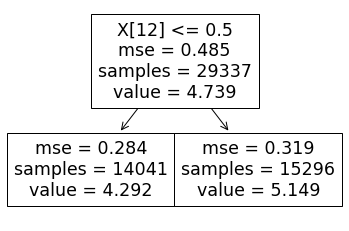

In [25]:
plot_tree(dt)

In [26]:
dv.feature_names_[12]

'room_type=Entire home/apt'

Which feature is used for splitting the data?

* `room_type`
* `neighbourhood_group`
* `number_of_reviews`
* `reviews_per_month`

## Question 2

Train a random forest model with these parameters:

* `n_estimators=10`
* `random_state=1`
* `n_jobs=-1`  (optional - to make training faster)

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [28]:
rf = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)

In [29]:
rf.fit(X_train, y_train)
y_preds = rf.predict(X_val)

In [30]:
mean_squared_error(y_val, y_preds, squared=False)

0.4598535778342608

What's the RMSE of this model on validation?

* 0.059
* 0.259
* 0.459
* 0.659

## Question 3

Now let's experiment with the `n_estimators` parameter

* Try different values of this parameter from 10 to 200 with step 10
* Set `random_state` to `1`
* Evaluate the model on the validation dataset

In [25]:
scores = {}
for n in range(10, 201, 10):
    rf = RandomForestRegressor(n_estimators=n, random_state=1, n_jobs=-1)
    rf.fit(X_train, y_train)
    y_preds = rf.predict(X_val)
    scores[n] = mean_squared_error(y_val, y_preds, squared=False)

In [26]:
scores

{10: 0.4598535778342608,
 20: 0.447831226476177,
 30: 0.4451200348449819,
 40: 0.44322540476599925,
 50: 0.4422309033499618,
 60: 0.4415347874157756,
 70: 0.4408665092520829,
 80: 0.44076264110112295,
 90: 0.4402436823066316,
 100: 0.439782812295518,
 110: 0.4393283276631756,
 120: 0.439140100985395,
 130: 0.4392600896545383,
 140: 0.4391068172724505,
 150: 0.4390987893907921,
 160: 0.43891283738859316,
 170: 0.43886569128153563,
 180: 0.4390536136991924,
 190: 0.4389458407581751,
 200: 0.4389432007046648}

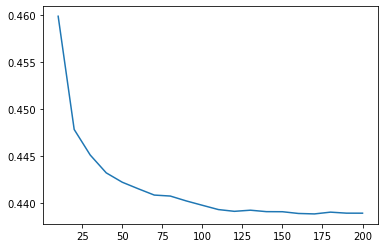

In [30]:
plt.plot(scores.keys(), scores.values())

After which value of `n_estimators` does RMSE stop improving?

- 10
- 50
- 70
- 120

## Question 4

Let's select the best `max_depth`:

* Try different values of `max_depth`: `[10, 15, 20, 25]`
* For each of these values, try different values of `n_estimators` from 10 till 200 (with step 10)
* Fix the random seed: `random_state=1`

In [ ]:
scores = {}
for d in [10, 15, 20, 25]:
    for n in range(10, 201, 10):
        rf = RandomForestRegressor(n_estimators=n, max_depth=d, random_state=1, n_jobs=-1)
        rf.fit(X_train, y_train)
        y_preds = rf.predict(X_val)
        scores[(n, d)] = mean_squared_error(y_val, y_preds, squared=False)

In [ ]:
scores

What's the best `max_depth`:

* 10
* 15
* 20
* 25

Bonus question (not graded):

Will the answer be different if we change the seed for the model?

In [ ]:
15

## Question 5

We can extract feature importance information from tree-based models. 

At each step of the decision tree learning algorith, it finds the best split. 
When doint it, we can calculate "gain" - the reduction in impurity before and after the split. 
This gain is quite useful in understanding what are the imporatant features 
for tree-based models.

In Scikit-Learn, tree-based models contain this information in the `feature_importances_` field. 

For this homework question, we'll find the most important feature:

* Train the model with these parametes:
    * `n_estimators=10`,
    * `max_depth=20`,
    * `random_state=1`,
    * `n_jobs=-1` (optional)
* Get the feature importance information from this model

In [31]:
rf = RandomForestRegressor(n_estimators=10, max_depth=20, random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)
y_preds = rf.predict(X_val)
mean_squared_error(y_val, y_preds, squared=False)

0.45976438614210824

In [32]:
list(rf.feature_importances_)

[0.07656575602038891,
 0.030263881888999422,
 0.15175550002877586,
 0.15347560060953339,
 0.05316959753835208,
 0.0004472734749035815,
 0.0011145011423147665,
 0.034043659332215426,
 0.001034143501453153,
 8.371271708698621e-05,
 0.042518523151637094,
 0.05459457652195896,
 0.3918980233885284,
 0.004877070765213998,
 0.004158179918638004]

In [33]:
dv.feature_names_

['availability_365',
 'calculated_host_listings_count',
 'latitude',
 'longitude',
 'minimum_nights',
 'neighbourhood_group=Bronx',
 'neighbourhood_group=Brooklyn',
 'neighbourhood_group=Manhattan',
 'neighbourhood_group=Queens',
 'neighbourhood_group=Staten Island',
 'number_of_reviews',
 'reviews_per_month',
 'room_type=Entire home/apt',
 'room_type=Private room',
 'room_type=Shared room']

In [34]:
feat_import_dict = dict(zip(dv.feature_names_, list(rf.feature_importances_)))

In [35]:
{k: v for k, v in sorted(feat_import_dict.items(), key = lambda item: item[1], reverse = True)}

{'room_type=Entire home/apt': 0.3918980233885284,
 'longitude': 0.15347560060953339,
 'latitude': 0.15175550002877586,
 'availability_365': 0.07656575602038891,
 'reviews_per_month': 0.05459457652195896,
 'minimum_nights': 0.05316959753835208,
 'number_of_reviews': 0.042518523151637094,
 'neighbourhood_group=Manhattan': 0.034043659332215426,
 'calculated_host_listings_count': 0.030263881888999422,
 'room_type=Private room': 0.004877070765213998,
 'room_type=Shared room': 0.004158179918638004,
 'neighbourhood_group=Brooklyn': 0.0011145011423147665,
 'neighbourhood_group=Queens': 0.001034143501453153,
 'neighbourhood_group=Bronx': 0.0004472734749035815,
 'neighbourhood_group=Staten Island': 8.371271708698621e-05}

What's the most important feature? 

* `neighbourhood_group=Manhattan`
* `room_type=Entire home/apt`	
* `longitude`
* `latitude`

## Question 6

Now let's train an XGBoost model! For this question, we'll tune the `eta` parameter

* Install XGBoost
* Create DMatrix for train and validation
* Create a watchlist
* Train a model with these parameters for 100 rounds:

```
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
```

In [17]:
# pip install xgboost

In [4]:
import xgboost as xgb

In [16]:
dtrain = xgb.DMatrix(X_train, label = y_train, feature_names=dv.feature_names_)
dval = xgb.DMatrix(X_val, label = y_val, feature_names=dv.feature_names_)

In [18]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [19]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
}

In [20]:
model = xgb.train(xgb_params, dtrain,
                  num_boost_round=100,
                  evals=watchlist, verbose_eval=10)

[0]	train-rmse:3.02752	val-rmse:3.02415
[10]	train-rmse:0.43912	val-rmse:0.44981
[20]	train-rmse:0.41716	val-rmse:0.43691
[30]	train-rmse:0.40712	val-rmse:0.43543
[40]	train-rmse:0.40103	val-rmse:0.43466
[50]	train-rmse:0.39446	val-rmse:0.43384
[60]	train-rmse:0.38743	val-rmse:0.43404
[70]	train-rmse:0.38117	val-rmse:0.43467
[80]	train-rmse:0.37668	val-rmse:0.43526
[90]	train-rmse:0.36998	val-rmse:0.43539
[99]	train-rmse:0.36478	val-rmse:0.43621


Now change `eta` first to `0.1` and then to `0.01`

In [21]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
}

In [22]:
model = xgb.train(xgb_params, dtrain,
                  num_boost_round=100,
                  evals=watchlist, verbose_eval=10)

[0]	train-rmse:3.87217	val-rmse:3.86889
[10]	train-rmse:1.41910	val-rmse:1.41786
[20]	train-rmse:0.64528	val-rmse:0.64883
[30]	train-rmse:0.46186	val-rmse:0.47101
[40]	train-rmse:0.42770	val-rmse:0.44150
[50]	train-rmse:0.41868	val-rmse:0.43589
[60]	train-rmse:0.41432	val-rmse:0.43460
[70]	train-rmse:0.41059	val-rmse:0.43361
[80]	train-rmse:0.40747	val-rmse:0.43306
[90]	train-rmse:0.40478	val-rmse:0.43280
[99]	train-rmse:0.40277	val-rmse:0.43250


In [23]:
xgb_params = {
    'eta': 0.01, 
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
}

In [24]:
model = xgb.train(xgb_params, dtrain,
                  num_boost_round=100,
                  evals=watchlist, verbose_eval=10)

[0]	train-rmse:4.25336	val-rmse:4.25010
[10]	train-rmse:3.85242	val-rmse:3.84921
[20]	train-rmse:3.49030	val-rmse:3.48719
[30]	train-rmse:3.16332	val-rmse:3.16029
[40]	train-rmse:2.86817	val-rmse:2.86533
[50]	train-rmse:2.60185	val-rmse:2.59925
[60]	train-rmse:2.36167	val-rmse:2.35927
[70]	train-rmse:2.14519	val-rmse:2.14303
[80]	train-rmse:1.95022	val-rmse:1.94827
[90]	train-rmse:1.77472	val-rmse:1.77302
[99]	train-rmse:1.63198	val-rmse:1.63045


What's the best eta?

* 0.3
* 0.1
* 0.01

## Submit the results


Submit your results here: https://forms.gle/wQgFkYE6CtdDed4w8

It's possible that your answers won't match exactly. If it's the case, select the closest one.


## Deadline


The deadline for submitting is 20 October 2021, 17:00 CET (Wednesday). After that, the form will be closed.

